In [28]:
from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup

Data Extraction and Scrapping Using Selenium and Beautiful Soup

In [29]:
driver = webdriver.Chrome()

In [30]:
driver.get(url='https://www.bloomberg.com/billionaires/')

In [31]:
driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)

In [32]:
html = driver.page_source
html

'<html xmlns="http://www.w3.org/1999/xhtml" class="no-js" lang="en"><!--<![endif]--><head><meta http-equiv="origin-trial" content="A/kargTFyk8MR5ueravczef/wIlTkbVk1qXQesp39nV+xNECPdLBVeYffxrM8TmZT6RArWGQVCJ0LRivD7glcAUAAACQeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkRpc2FibGVUaGlyZFBhcnR5U3RvcmFnZVBhcnRpdGlvbmluZzIiLCJleHBpcnkiOjE3NDIzNDIzOTksImlzU3ViZG9tYWluIjp0cnVlLCJpc1RoaXJkUGFydHkiOnRydWV9">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link rel="preconnect" href="//assets.bwbx.io">\n    <link rel="dns-prefetch" href="//assets.bwbx.io">\n    <link rel="preconnect" href="https://sourcepointcmp.bloomberg.com" crossorigin="anonymous">\n    <meta name="format-detection" content="telephone=no">\n\n    <link rel="icon" type="image/png" href="/favicon-black.png">\n\n    <meta property="og:site_name" content="Bloomberg.com">\n    <meta prope

In [33]:
soup = BeautifulSoup(html, 'html.parser')

In [34]:
soup.title

<title>Bloomberg Billionaires Index</title>

In [35]:
data = soup.find_all('div', {'class':'table-row'})
len(data)

499

In [36]:
data[0]

<div class="table-row">
<div class="table-cell t-rank">
          1
        </div>
<div class="table-cell t-name"><a href="./profiles/elon-r-musk/">
            Elon Musk</a></div>
<div class="table-cell active t-nw">
          $240B
        </div>
<div class="table-cell t-lcd neg">
          -$15.0B
        </div>
<!-- <div class="table-cell t-lcp neg">-6.5%</div> -->
<div class="table-cell t-ycd pos">
          +$10.7B
        </div>
<!-- <div class="table-cell t-ycp pos">+4.7%</div> -->
<div class="table-cell t-country">
          United States
        </div>
<div class="table-cell t-industry">
          Technology
        </div>
</div>

In [37]:
data[0].find('div', {'class':"table-cell t-rank"}).text.strip()

'1'

In [38]:
data[0].find('div', {'class':"table-cell t-name"}).text.strip()

'Elon Musk'

In [39]:
import pandas as pd

# List to store data
billionaires_data = []

# Loop through each row of the scraped data
for row in data:
    rank = row.find('div', {'class': 'table-cell t-rank'}).text.strip()
    name = row.find('div', {'class': 'table-cell t-name'}).text.strip()
    net_worth = row.find('div', {'class': 'table-cell active t-nw'})
    lcd_change = row.find('div', {'class': 'table-cell t-lcd neg'}) if row.find('div', {'class': 't-lcd'}) else None
    ycd_change = row.find('div', {'class': 'table-cell t-ycd pos'})if row.find('div', {'class': 't-ycd'}) else None
    country = row.find('div', {'class': 'table-cell t-country'}).text.strip()
    industry = row.find('div', {'class': 'table-cell t-industry'}).text.strip()

    # Append the row to the list
    billionaires_data.append([rank, name, net_worth, lcd_change, ycd_change, country, industry])

# Create DataFrame
columns = ['Rank', 'Name', 'Net Worth', 'Last Change', 'Year Change', 'Country', 'Industry']
df = pd.DataFrame(billionaires_data, columns=columns)

# Display DataFrame
print(df.head())


  Rank             Name                      Net Worth  \
0    1        Elon Musk  [\n          $240B\n        ]   
1    2       Jeff Bezos  [\n          $212B\n        ]   
2    3  Mark Zuckerberg  [\n          $209B\n        ]   
3    4  Bernard Arnault  [\n          $190B\n        ]   
4    5    Larry Ellison  [\n          $185B\n        ]   

                       Last Change                      Year Change  \
0  [\n          -$15.0B\n        ]  [\n          +$10.7B\n        ]   
1                             None  [\n          +$34.6B\n        ]   
2                             None  [\n          +$80.6B\n        ]   
3   [\n          -$506M\n        ]                             None   
4   [\n          -$666M\n        ]  [\n          +$62.5B\n        ]   

         Country    Industry  
0  United States  Technology  
1  United States  Technology  
2  United States  Technology  
3         France    Consumer  
4  United States  Technology  


In [40]:
import pandas as pd

# List to store data
billionaires_data = []

# Loop through each row of the scraped data
for row in data:
    rank = row.find('div', {'class': 'table-cell t-rank'}).text.strip()
    name = row.find('div', {'class': 'table-cell t-name'}).text.strip()
    
    # Clean net worth by stripping extra spaces and newlines
    net_worth = row.find('div', {'class': 'table-cell active t-nw'}).text.strip()
    net_worth = net_worth.replace('\n', '').replace(' ', '')
    
    # Clean last change by stripping extra spaces and newlines
    lcd_change = row.find('div', {'class': 'table-cell t-lcd neg'})
    lcd_change = lcd_change.text.strip().replace('\n', '').replace(' ', '') if lcd_change else '0'
    
    # Clean year change by stripping extra spaces and newlines
    ycd_change = row.find('div', {'class': 'table-cell t-ycd pos'})
    ycd_change = ycd_change.text.strip().replace('\n', '').replace(' ', '') if ycd_change else '0'
    
    country = row.find('div', {'class': 'table-cell t-country'}).text.strip()
    industry = row.find('div', {'class': 'table-cell t-industry'}).text.strip()

    # Append the row to the list
    billionaires_data.append([rank, name, net_worth, lcd_change, ycd_change, country, industry])

# Create DataFrame
columns = ['Rank', 'Name', 'Net Worth', 'Last Change', 'Year Change', 'Country', 'Industry']
df = pd.DataFrame(billionaires_data, columns=columns)

# Display DataFrame
print(df.head())


  Rank             Name Net Worth Last Change Year Change        Country  \
0    1        Elon Musk     $240B     -$15.0B     +$10.7B  United States   
1    2       Jeff Bezos     $212B           0     +$34.6B  United States   
2    3  Mark Zuckerberg     $209B           0     +$80.6B  United States   
3    4  Bernard Arnault     $190B      -$506M           0         France   
4    5    Larry Ellison     $185B      -$666M     +$62.5B  United States   

     Industry  
0  Technology  
1  Technology  
2  Technology  
3    Consumer  
4  Technology  


In [41]:
df

,Rank,Name,Net Worth,Last Change,Year Change,Country,Industry
0,1,Elon Musk,$240B,-$15.0B,+$10.7B,United States,Technology
1,2,Jeff Bezos,$212B,0,+$34.6B,United States,Technology
2,3,Mark Zuckerberg,$209B,0,+$80.6B,United States,Technology
3,4,Bernard Arnault,$190B,-$506M,0,France,Consumer
4,5,Larry Ellison,$185B,-$666M,+$62.5B,United States,Technology
...,...,...,...,...,...,...,...
494,496,Renate Reimann-Haas,$6.38B,0,+$2.35B,Austria,Retail
495,497,Matthias Reimann-Andersen,$6.38B,0,+$2.35B,Austria,Retail
496,498,Stefan Reimann-Andersen,$6.38B,0,+$2.35B,Austria,Retail
497,499,Wolfgang Reimann,$6.38B,0,+$2.35B,Austria,Retail


Data Visulaization

In [ ]:
# Summary Statistics

In [42]:
# Import necessary libraries
import pandas as pd

# Assuming df is the DataFrame you provided
df['Net Worth Numeric'] = df['Net Worth'].replace({'\$':'', 'B':''}, regex=True).astype(float)

# Calculate summary statistics for the "Net Worth"
summary_stats = df['Net Worth Numeric'].describe()
print(summary_stats)


count    499.000000
mean      19.229659
std       28.196153
min        6.380000
25%        7.840000
50%       10.600000
75%       16.950000
max      240.000000
Name: Net Worth Numeric, dtype: float64


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\singh\AppData\Local\Temp\ipykernel_619408\4070497365.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Net Worth Numeric'] = df['Net Worth'].replace({'\$':'', 'B':''}, regex=True).astype(float)


In [ ]:
# Top 10 Indian billionaires

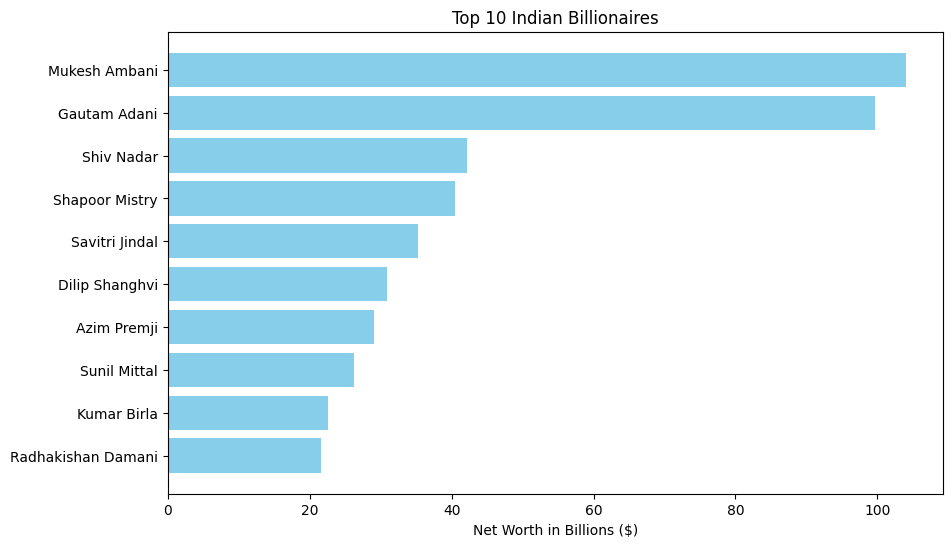

In [43]:
import matplotlib.pyplot as plt

# Filter Indian billionaires
india_billionaires = df[df['Country'] == 'India'].nlargest(10, 'Net Worth Numeric')

# Plotting
plt.figure(figsize=(10,6))
plt.barh(india_billionaires['Name'], india_billionaires['Net Worth Numeric'], color='skyblue')
plt.xlabel('Net Worth in Billions ($)')
plt.title('Top 10 Indian Billionaires')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Country Representation

Country with highest representation: United States


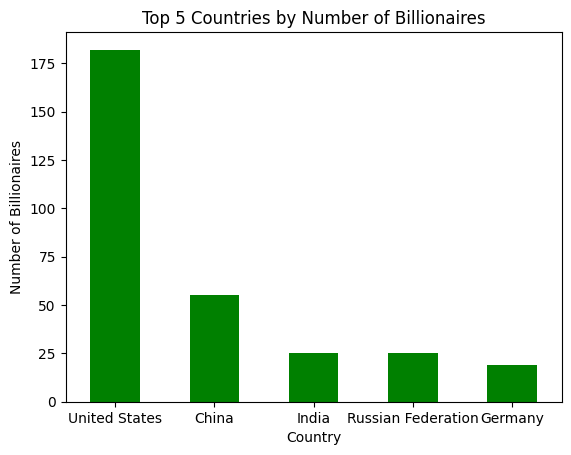

In [57]:
# Count the number of billionaires per country
top_countries = df['Country'].value_counts().head(5)

# Display the country with the highest representation
print(f"Country with highest representation: {top_countries.idxmax()}")

# Plotting
top_countries.plot(kind='bar', color='green')
plt.ylabel('Number of Billionaires')
plt.title('Top 5 Countries by Number of Billionaires')

# Rotate the x-axis labels
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Industry Representation

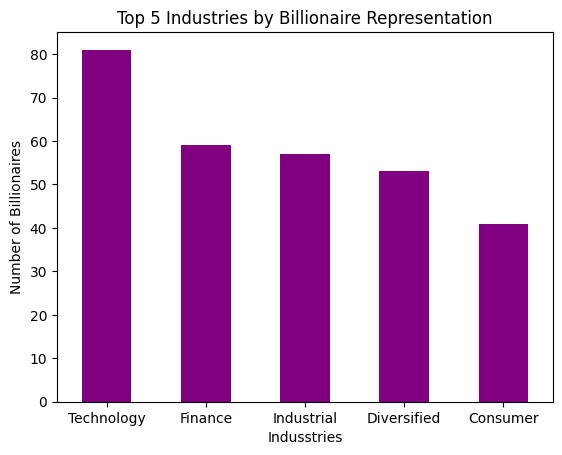

In [56]:
# Count the number of billionaires per industry
top_industries = df['Industry'].value_counts().head(5)

# Plotting
top_industries.plot(kind='bar', color='purple')

plt.ylabel('Number of Billionaires')
plt.xlabel('Indusstries')
plt.title('Top 5 Industries by Billionaire Representation')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Continent Mapping

In [48]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<>:27: SyntaxWarning: invalid escape sequence '\$'
<>:27: SyntaxWarning: invalid escape sequence '\$'
C:\Users\singh\AppData\Local\Temp\ipykernel_619408\2623094515.py:27: SyntaxWarning: invalid escape sequence '\$'
  df['Net Worth'] = df['Net Worth'].replace({'\$':'', 'B':'', 'M':''}, regex=True).astype(float)


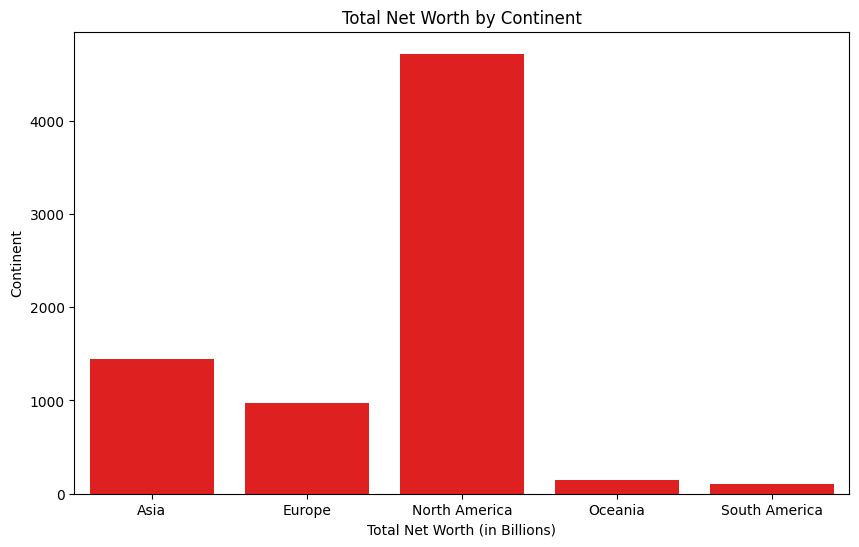

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping countries to continents
continent_mapping = {
    'United States': 'North America', 
    'France': 'Europe',
    'India': 'Asia',
    # Add more country-to-continent mappings based on your dataset
    'China': 'Asia',
    'Germany': 'Europe',
    'United Kingdom': 'Europe',
    'Russia': 'Europe',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Australia': 'Oceania',
    # Continue to map the rest of the countries in your dataset
}

# Add the 'Continent' column by mapping the 'Country' column
df['Continent'] = df['Country'].map(continent_mapping)

# Remove rows where continent is not mapped (if any country is missing from the dictionary)
df = df.dropna(subset=['Continent'])

# Calculate total net worth for each continent
df['Net Worth'] = df['Net Worth'].replace({'\$':'', 'B':'', 'M':''}, regex=True).astype(float)
continent_net_worth = df.groupby('Continent')['Net Worth'].sum()

# Plot total net worth by continent
plt.figure(figsize=(10, 6))
sns.barplot(y=continent_net_worth.values, x=continent_net_worth.index, color='red')
plt.title('Total Net Worth by Continent')
plt.xlabel('Total Net Worth (in Billions)')
plt.ylabel('Continent')
plt.show()
